# Imports

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from PIL import Image

import sys
sys.path.append('..')
from utils import distort_image

# Preamble

In [2]:
plt.rcParams['text.color'] = 'black'

img_path = '../data/tiny-imagenet-200/test/images/test_0.JPEG'
img = Image.open(img_path)
img = np.array(img)

num_tests = 10

def show_images(images: list[np.ndarray], titles: list[str], title: str):
    n = len(images)
    plt.figure(figsize=(32, 32))
    plt.title(title)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()

# FoV angle test (removed)

The FoV angle should be between $]0, \pi/2[$

![FoV angle](fov_angle.png "FoV angle")

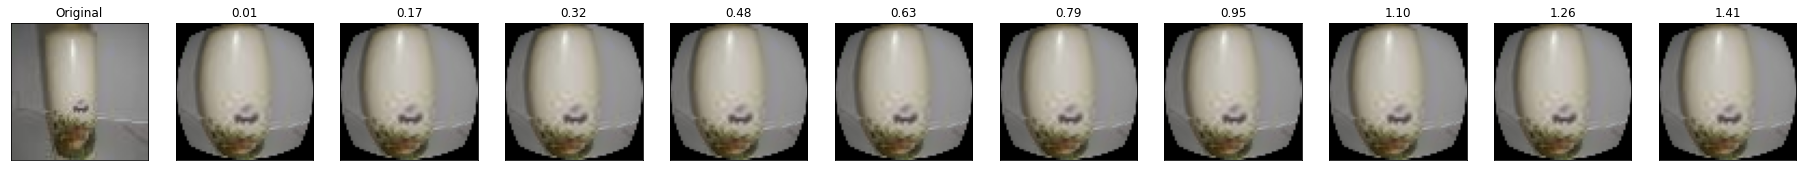

In [3]:
D = [0.5, 0.5, 0.5, 0.5]

start = 0.01
end = np.pi/2

images = [img]
titles = ['Original']

for alpha in np.linspace(start, end, num_tests, endpoint=False):
    distorted = distort_image(img, D)
    images.append(distorted)
    titles.append(f'{alpha:.2f}')

show_images(images, titles, 'FoV angle')
images.clear()
titles.clear()

# Distortion parameters tests

## One-parameter sweep

We start by sweeping $k_1$ and keeping $k_2$, $k_3$ and $k_4$ constant. Then we sweep $k_2$ and keep the rest constant, and so on.

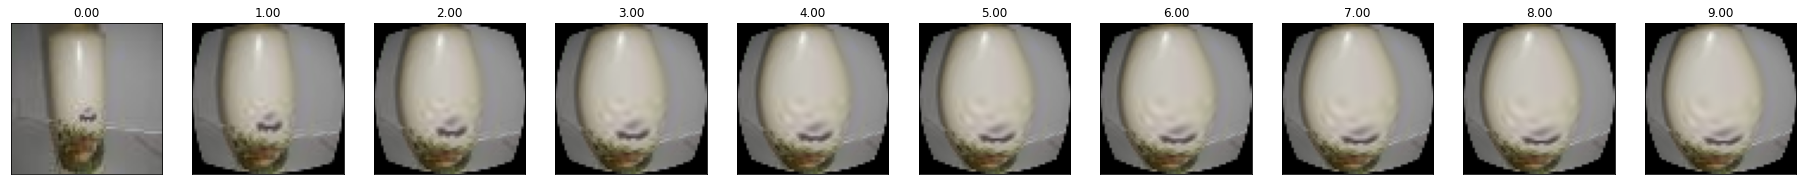

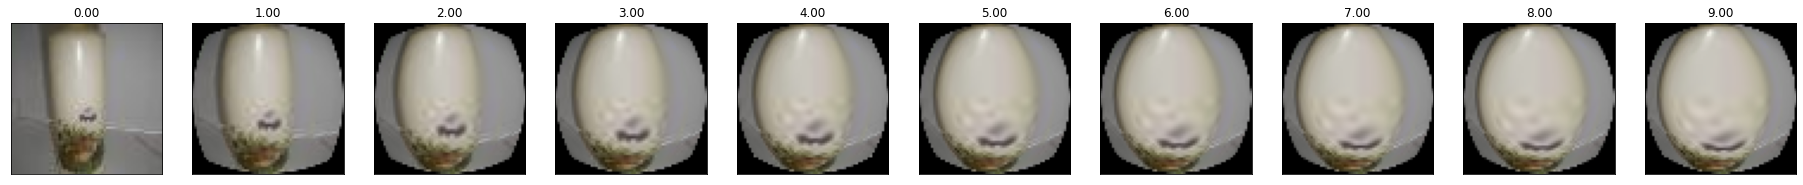

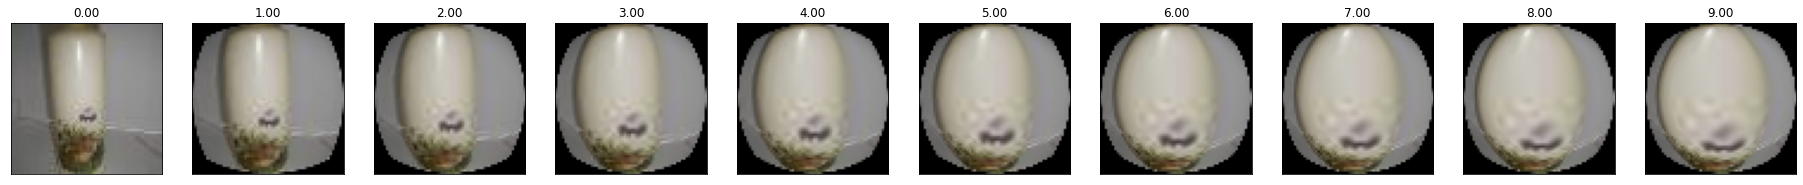

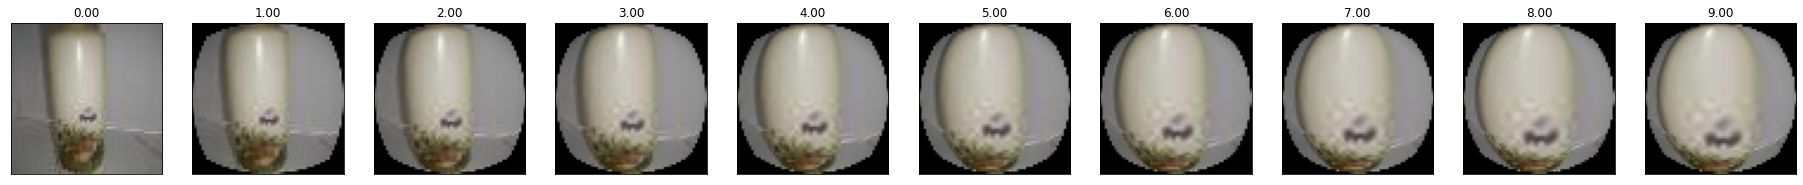

In [4]:
D = [0, 0, 0, 0]

start = 0
end = 10

titles = [f'{k:.2f}' for k in np.linspace(start, end, num_tests, endpoint=False)]

for i in range(4):
    images = []
    for k in np.linspace(start, end, num_tests, endpoint=False):
        D_copy = D.copy()
        D_copy[i] = k
        distorted = distort_image(img, D_copy)
        images.append(distorted)
    show_images(images, titles, f'k{i+1}')

images.clear()
titles.clear()

## All parameters 

We sweep all the parameters at once.

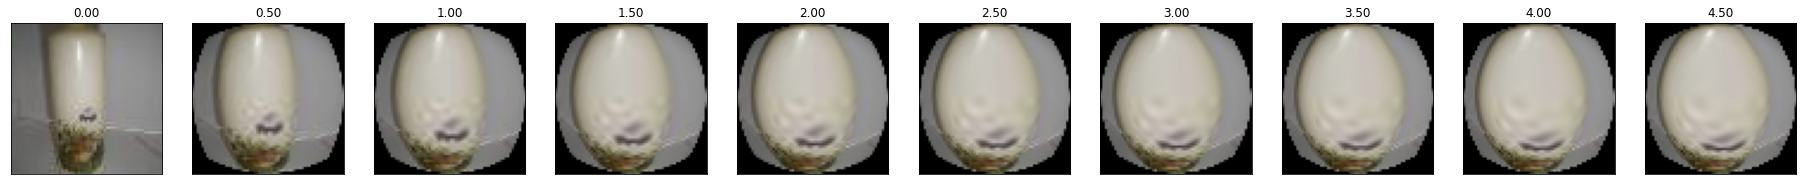

In [5]:
start = 0
end = 5

images = []
titles = [f'{k:.2f}' for k in np.linspace(start, end, num_tests, endpoint=False)]

for k in np.linspace(start, end, num_tests, endpoint=False):
    distorted = distort_image(img, [k]*4)
    images.append(distorted)
show_images(images, titles, f'k{i+1}')


In [7]:
def distort_and_show(k1, k2, k3, k4):
    distorted = distort_image(img, [k1, k2, k3, k4])

    _, ax = plt.subplots(figsize=(8, 8))
    ax.axis('off')
    ax.set_title('Distorted image')
    ax.imshow(distorted)

K_MIN = 0
K_MAX = 10
K_VAL = 0.5

STEP = 0.01

ipywidgets.interact(
    distort_and_show,
    k1=ipywidgets.FloatSlider(min=K_MIN, max=K_MAX, step=STEP, value=K_VAL),
    k2=ipywidgets.FloatSlider(min=K_MIN, max=K_MAX, step=STEP, value=K_VAL),
    k3=ipywidgets.FloatSlider(min=K_MIN, max=K_MAX, step=STEP, value=K_VAL),
    k4=ipywidgets.FloatSlider(min=K_MIN, max=K_MAX, step=STEP, value=K_VAL),
)

interactive(children=(FloatSlider(value=0.5, description='k1', max=10.0, step=0.01), FloatSlider(value=0.5, de…

<function __main__.distort_and_show(k1, k2, k3, k4)>